# Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Install Modules

In [2]:
!pip install plotnine
!pip install haversine
!pip install geopy
!pip install arrow
!pip install geopandas
!pip install plotly
!pip install pygeocoder
!pip install gcmap
!pip install gmplot

     |████████████████████████████████| 60 kB 5.4 MB/s 
     |████████████████████████████████| 994 kB 32.1 MB/s 
     |████████████████████████████████| 15.4 MB 38 kB/s 
     |████████████████████████████████| 6.3 MB 46.4 MB/s 
  Created wheel for pygeocoder: filename=pygeocoder-1.2.5-py3-none-any.whl size=8911 sha256=89ff1701a931af0396449e8c00ef38c6746e90bd1a09f12c00782d615ff2d83f
  Stored in directory: /root/.cache/pip/wheels/fd/77/97/9c0c6cd57eed0daa759d2ad98217602333225936236862528c
Successfully built pygeocoder
     |████████████████████████████████| 795 kB 22.3 MB/s 
  Created wheel for gcmap: filename=gcmap-0.0.6-py3-none-any.whl size=4730 sha256=105d621942e1e213f175c6aeb11eef224f8b2d6b4033fccead227fbcd7fd90d7
  Stored in directory: /root/.cache/pip/wheels/c7/31/e3/ccbcddf1823f81f4cc9353b9d2c2a95c0071b5e2092eb53d87
Successfully built gcmap
     |████████████████████████████████| 164 kB 28.8 MB/s 


# Imports

In [3]:
import numpy as np
import pandas as pd
import datetime
from math import radians
from haversine import Unit
import haversine as hs
import seaborn as sns
import math
import matplotlib.pyplot as plt
import geopandas as gpd
%matplotlib inline
import folium
import seaborn as sns

# Input Data

In [4]:
april_20 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cyclistic/Data/202004-divvy-tripdata.csv')
may_20 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cyclistic/Data/202005-divvy-tripdata.csv')
june_20 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cyclistic/Data/202006-divvy-tripdata.csv')
july_20 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cyclistic/Data/202007-divvy-tripdata.csv')
aug_20 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cyclistic/Data/202008-divvy-tripdata.csv')
sept_20 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cyclistic/Data/202009-divvy-tripdata.csv')
oct_20 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cyclistic/Data/202010-divvy-tripdata.csv')
nov_20 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cyclistic/Data/202011-divvy-tripdata.csv')
dec_20 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cyclistic/Data/202012-divvy-tripdata.csv')
jan_21 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cyclistic/Data/202101-divvy-tripdata.csv')
feb_21 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cyclistic/Data/202102-divvy-tripdata.csv')
mar_21 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cyclistic/Data/202103-divvy-tripdata.csv')

# Combine input data files

In [5]:
tripdata_withDoubles = pd.concat([april_20,may_20,june_20,july_20,aug_20,sept_20,oct_20,nov_20,
                                  dec_20,jan_21,feb_21,mar_21],axis = 0) 

In [6]:
tripdata_withDoubles["start_station_id"] =  tripdata_withDoubles["start_station_id"].astype('str')
tripdata_withDoubles["end_station_id"] = tripdata_withDoubles["end_station_id"].astype('str')

In [7]:
all_tripdata = tripdata_withDoubles.copy()

# Raw Data Summary

In [8]:
all_tripdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3489748 entries, 0 to 228495
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 372.7+ MB


In [9]:
all_tripdata.describe()

,start_lat,start_lng,end_lat,end_lng
count,3.489748e+06,3.489748e+06,3.485010e+06,3.485010e+06
mean,4.190417e+01,-8.764494e+01,4.190444e+01,-8.764522e+01
std,4.364222e-02,2.575969e-02,4.373705e-02,2.589123e-02
min,4.164000e+01,-8.787000e+01,4.154000e+01,-8.807000e+01
25%,4.188224e+01,-8.765888e+01,4.188266e+01,-8.765917e+01
50%,4.190000e+01,-8.764170e+01,4.190068e+01,-8.764275e+01
75%,4.193000e+01,-8.762773e+01,4.193120e+01,-8.762775e+01
max,4.208000e+01,-8.752000e+01,4.216000e+01,-8.744000e+01


In [10]:
all_tripdata.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member


# Data Cleaning

## Missing Data

In [11]:
all_tripdata.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    122175
start_station_id           0
end_station_name      143242
end_station_id             0
start_lat                  0
start_lng                  0
end_lat                 4738
end_lng                 4738
member_casual              0
dtype: int64

In [12]:
df_no_miss = all_tripdata[~all_tripdata['start_station_id'].isna()]
df_no_miss = all_tripdata[~all_tripdata['start_station_name'].isna()]
df_no_miss = all_tripdata[all_tripdata['end_station_id']!='nan']

In [13]:
df_no_miss.dropna(axis=0,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df_no_miss.isna().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

## Check for invalid data

In [15]:
df_no_miss.ended_at = pd.to_datetime(df_no_miss['ended_at'], format = '%Y-%m-%d %H:%M:%S')
df_no_miss.started_at = pd.to_datetime(df_no_miss['started_at'], format = '%Y-%m-%d %H:%M:%S')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [16]:
df_no_miss = df_no_miss[~(df_no_miss['ended_at']<=df_no_miss['started_at'])]

In [17]:
df_no_miss[(df_no_miss['ended_at']<=df_no_miss['started_at'])]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual


In [18]:
df = df_no_miss.copy()

# Data Transformation

In [19]:
df['ride_length'] = df['ended_at'] - df['started_at']

In [20]:
df['ride_month'],df['ride_weekday'],df['ride_time'],df['ride_weekday_no'], df['ride_month_no'] = df.started_at.dt.month_name(), df.started_at.dt.day_name(), df.started_at.dt.hour, df.started_at.dt.dayofweek, df.started_at.dt.month 

In [21]:
def get_dist(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [22]:
df['distance'] = round(get_dist(df.start_lng,df.start_lat,df.end_lng,df.end_lat),2)

In [23]:
df['ride_length_min'] = round(df.ride_length.dt.total_seconds()/60, 4)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3284416 entries, 0 to 228494
Data columns (total 21 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       object         
 2   started_at          datetime64[ns] 
 3   ended_at            datetime64[ns] 
 4   start_station_name  object         
 5   start_station_id    object         
 6   end_station_name    object         
 7   end_station_id      object         
 8   start_lat           float64        
 9   start_lng           float64        
 10  end_lat             float64        
 11  end_lng             float64        
 12  member_casual       object         
 13  ride_length         timedelta64[ns]
 14  ride_month          object         
 15  ride_weekday        object         
 16  ride_time           int64          
 17  ride_weekday_no     int64          
 18  ride_month_no       int64          
 19  distance            fl

# Analysis

## Distance Calculating function

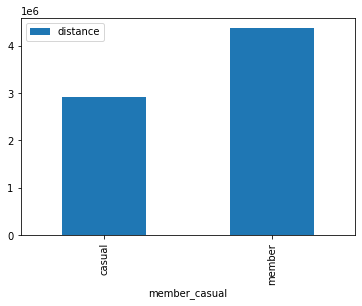

In [25]:
df['ride_time_sec'] = (df['ride_length'].dt.total_seconds())
df.loc[:,['member_casual','distance']].groupby(['member_casual']).sum().plot(kind = 'bar')
# [['distance']]

In [26]:
df.loc[:,['member_casual','distance']].groupby(['member_casual']).sum().reset_index()

,member_casual,distance
0,casual,2.909371e+06
1,member,4.373366e+06


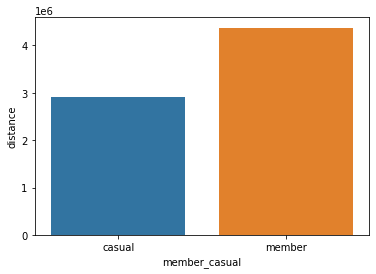

In [28]:
sns.barplot(x = 'member_casual',y='distance',data = df.loc[:,['member_casual','distance']].groupby(['member_casual']).sum().reset_index())

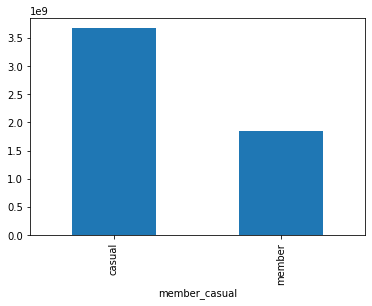

In [29]:
df.groupby('member_casual')['ride_time_sec'].sum().plot(kind = 'bar')

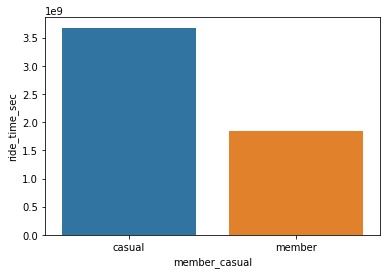

In [30]:
sns.barplot(x='member_casual',y='ride_time_sec', data=df.loc[:,['member_casual','ride_time_sec']].groupby(['member_casual']).sum().reset_index())

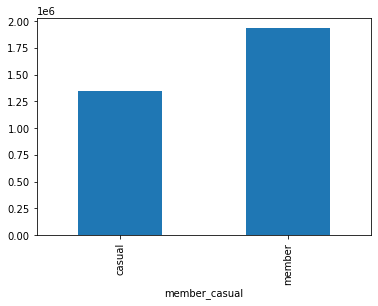

In [31]:
df.groupby('member_casual')['ride_id'].count().plot(kind = 'bar')

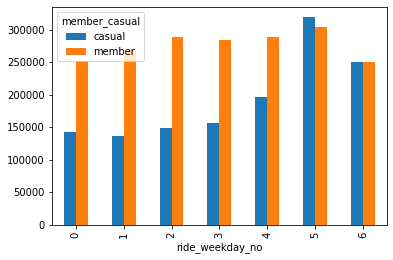

In [32]:
df.groupby(['ride_weekday_no','member_casual'])['ride_id'].count().unstack('member_casual').sort_values('ride_weekday_no').plot(kind = 'bar')     

In [33]:
df.groupby(['ride_weekday_no','member_casual'])['ride_id'].count()

ride_weekday_no  member_casual
0                casual           142044
                 member           251904
1                casual           136232
                 member           268216
2                casual           148362
                 member           288395
3                casual           156199
                 member           283740
4                casual           196474
                 member           288903
5                casual           319061
                 member           304617
6                casual           249786
                 member           250483
Name: ride_id, dtype: int64

In [34]:
grp_obj = pd.DataFrame(df.groupby(['ride_weekday_no','member_casual'])['ride_id'].count().reset_index())
days_dict= {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
grp_obj['ride_weekday_no'] = grp_obj['ride_weekday_no'].map(days_dict)

In [35]:
grp_obj

,ride_weekday_no,member_casual,ride_id
0,Mon,casual,142044
1,Mon,member,251904
2,Tue,casual,136232
3,Tue,member,268216
4,Wed,casual,148362
5,Wed,member,288395
6,Thu,casual,156199
7,Thu,member,283740
8,Fri,casual,196474
9,Fri,member,288903


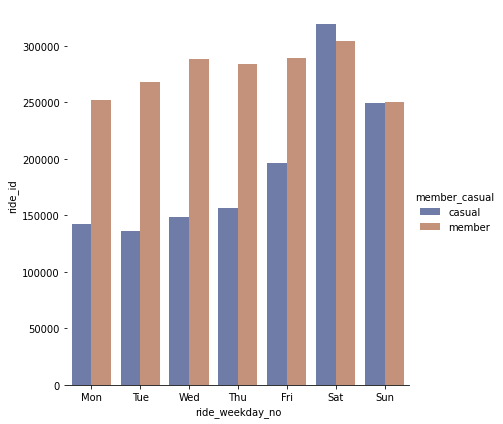

In [36]:
g = sns.catplot(
    data=grp_obj, kind="bar",
    x="ride_weekday_no", y="ride_id", hue="member_casual"
    , palette="dark", alpha=.6, height=6
)
g.despine(left=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


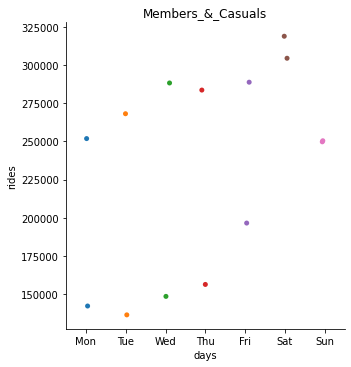

In [37]:
x = "ride_weekday_no"
y = "ride_id"
ax = sns.catplot(x,y,data=grp_obj);
ax.set(xlabel = "days", ylabel="rides");
plt.title('Members_&_Casuals');
plt.show()

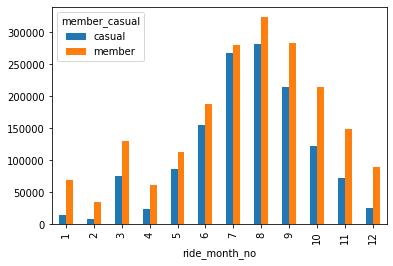

In [38]:
df.groupby(['ride_month_no','member_casual'])['ride_id'].count().unstack('member_casual').sort_values('ride_month_no').plot(kind = 'bar')     

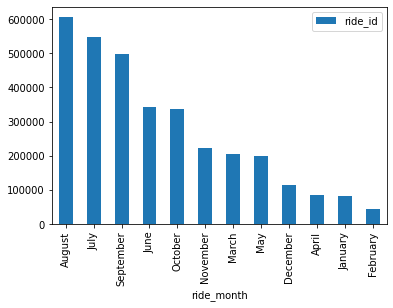

In [39]:
df.groupby('ride_month')['ride_id'].count().reset_index().sort_values('ride_id',ascending=False).plot(kind = 'bar', x = 'ride_month', y = 'ride_id')

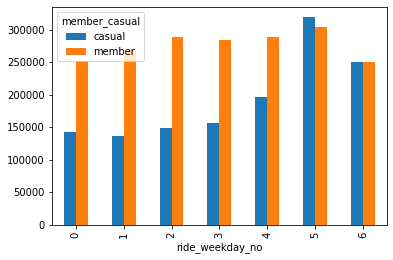

In [40]:
df.groupby(['ride_weekday_no','member_casual'])['ride_id'].count().unstack('member_casual').plot(kind='bar')

In [41]:
df['member_casual'].value_counts()

member    1936258
casual    1348158
Name: member_casual, dtype: int64

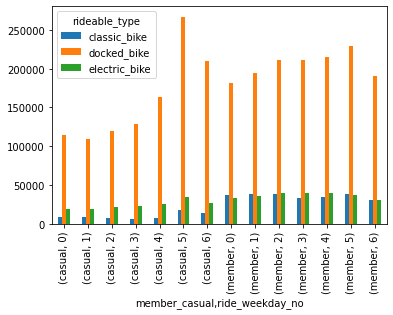

In [42]:
df.groupby(['member_casual','ride_weekday_no','rideable_type'])['ride_id'].count().unstack('rideable_type').plot(kind = 'bar')

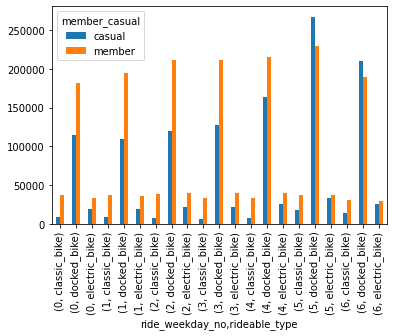

In [43]:
df.groupby(['member_casual','ride_weekday_no','rideable_type'])['rideable_type'].count().unstack('member_casual').plot(kind = 'bar')

In [44]:
def generate_map(map_location, map_style, start_lat_col, start_lng_col, start_color, end_lat_col, end_lng_col, end_color):
  folium_map = folium.Map(location=map_location,
                            zoom_start=11,
                            tiles=map_style)
  
  for index, row in df[:50].iterrows():
    folium.CircleMarker(location=(row[start_lat_col],
                                      row[start_lng_col]),
                            color=start_color,
                            radius=5,
                            weight=1,
                            fill=True).add_to(folium_map)

    folium.CircleMarker(location=(row[end_lat_col],
                                      row[end_lng_col]),
                            color=end_color,
                            radius=5,
                            weight=1,
                            fill=True).add_to(folium_map)

  return folium_map

  

In [45]:
generate_map([41.878100, -87.629800],"cartodbpositron","start_lat","start_lng",'#0A8A9F',"end_lat","end_lng",'#f68e56')